## TorchVision

A library within python for image and video processing.

It caontains a number of important and useful datasets, model architecture as well as models and tranformation operations that are commonly used for computer vision projects. 

There are seven main packages for the Torchvision library:

    1. Dataset
    2. IO
    3. Models
    4. Feature Extraction
    5. Ops
    6. Transforms
    7. Utils

## Dataset

All data sets are subset of torch.utils.data.Dataset. We can pass any of them through torch.utils.data.DatLoader which can load multiple samples in parallel using multiple processing workers. All datasets have identical implementaions and signatures. All of them have two common arguments: transform(Transforms the input) and target transform(Transforms the target)

Some of the most popular datasets are:
    
    1. CalTech (contains pictures of objects belonging to 101 categories, each have about 40 to 800 images)
    2. CIFAR (CIFAR 10 and CIFAR 100 are labelled datsets of the 80 million TinyImage data set)
    3. Cityscapes (This dataset focuses on semantic understanding of urban street scenes, with 50 cities, 25000 images)
    4. ImageNet (Contains 14,197,122 annotates images)
    5. EMNIST (Extended MNIST, cnostitues a challenging classification task involving letters and digits)
    6. Fashion-MNIST (consists training set of 60,000 examples and test set of 10,000 examples in 28x28 grayscale)
    7. KMNIST (Replacement for MNIST 28x28 grayscale with 70,00 images from original MNIST)

## IO

TorchVision IO package provides functions for performing IO operations, including reading and writing images and videos.

### Image

    1. read_image (reads a JPEG or PNG into 3-dimensional RGB tensor, values of the output tensor are between 0 and 255 uint8)
    2. decode_image (detects whether an image is a JPEG or PNG, and decodes into 3D RGB tensor)
    3. encode_jpeg (takes an imput tensor and CHW layout, return buffer with the content of corresponding JPEG file)
    4. decode_jpeg (decodes a JPEG image in 3D RGB tensor, optionally converts image to desired format)
    5. write_image (takes an imput tensor and CHW layout and saves it to a JPEG file)
    For each of the JPEG method above, there is an equivalent PNG format
    
### Videos
    
    1. read_video (read video from file, returns both videoframes and audio frames)
    2. read_video_timestamps (lists the video frame timestamps)
    3. write_video (writes a 4D tensor in THCW format, and a video file)
    4. VideoReader (high performance, low level API for more fine gain control video reading API)

## Models

The Models subpackage contains definitions of models for addressing different tasks, including image classification, pixel-wise semantic segmentation, object detection, instant segmentation, person key point detection, and video classification. 

There are 4 model sub packages:

    1. Classification
    2. Semantic segmentation
    3. Object/keypoint detection
    4. Video Classification

## Feature Extraction

This utility enables us to access intermediate transformations of the model inputs. TorchVision provies great feature extractors.

## Operators

Implements operators that are specific for computer vision. Some key operators are: 
    
    1. batched_nms (performs non-maximum supression in a batched fashion)
    2. box_area  (computes the area of a set of bounding boxes)
    3. clip_boxes_to_image (clip boxes so that they lie inside an image of a size)
    4. mosts_to_boxes (computesthe bounding boxes around the provided masks)
    5. remove_samll_boxes (remove boxes which contain at least one size smaller than min size)
    6. sigmoid_focal_loss (loss used in retina net got frnsde detection )
    7. stochastic_depth (implements the stochastic depth from deep networks,fo dropping residual branches of architecture)

##  Transforms
    
Allows ML engineers to perform various trasnformation steps on images, including rotation, cropping, composing, adjuting color jitter, converting to grayscale adjusting padding, resize

## Utils

Provides a number of processing utilities for comoputer vision tasks, including making a grid of images, saving a tensor into an image file, and drawing sigmentation masks on  object detection

In [1]:
%matplotlib inline

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image

plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)

def show(imgs):
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

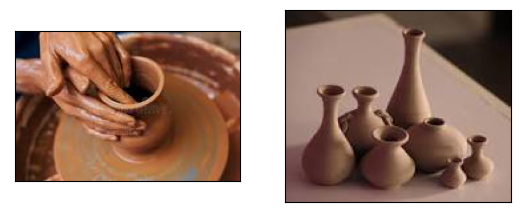

In [8]:
pottery1 = read_image(str(Path('images') / 'pottery1.jpeg'))
pottery2 = read_image(str(Path('images') / 'pottery2.jpeg'))
show([pottery1, pottery2])

In [15]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

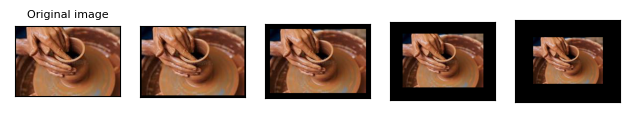

In [16]:
#Most tranforms natively support tensor on top of PIL images 
#images padding

from PIL import Image
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('images') / 'pottery1.jpeg')

padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

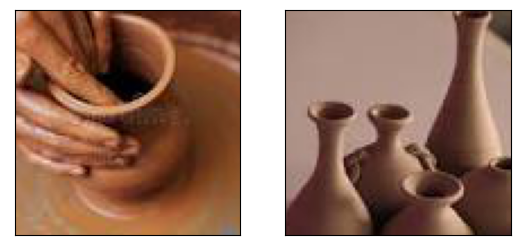

In [18]:
#random crop
import torch.nn as nn

transforms = torch.nn.Sequential(
    T.RandomCrop(100),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
pottery1 = pottery1.to(device)
pottery2 = pottery2.to(device)

transformed_pottery1 = transforms(pottery1)
transformed_pottery2 = transforms(pottery2)
show([transformed_pottery1, transformed_pottery2])

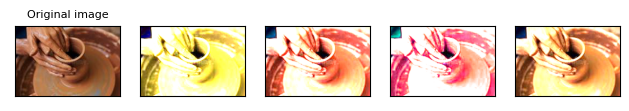

In [21]:
#color jitter
jitter = T.ColorJitter(brightness=5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

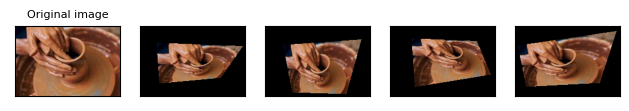

In [22]:
#random perspectives
perspective_transformer = T.RandomPerspective(distortion_scale = 0.6, p = 1.0)
perspective_imgs = [perspective_transformer(orig_img) for _  in range(4)]
plot(perspective_imgs)

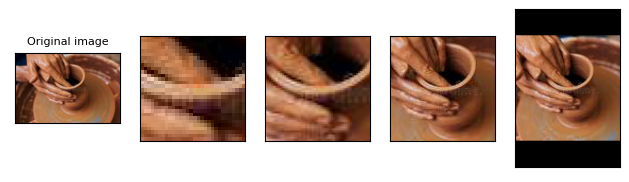

In [23]:
#various center crop
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)